In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"c:\Users\\acer\\Downloads\iris.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.drop(['Id'],axis=1,inplace=True)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_setosa=data[data[list(data.columns)[-1]]=='iris_setosa']
iris_versicolor=data[data[list(data.columns)[-1]]=='iris_versicolor']
iris_virginia=data[data[list(data.columns)[-1]]=='iris_virginia']


In [8]:
#labeling
from sklearn.preprocessing import LabelEncoder

x=data[list(data.columns)[:-1]]
y=data[list(data.columns)[-1]]

#initialize encoder
encoder=LabelEncoder()
encodedy=encoder.fit_transform(y)

#scaling features
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#initialize scaler
scaler=StandardScaler()
scaler.fit(x)
scaledx=scaler.transform(x)
scaledx

mxscaler=MinMaxScaler()
scaledx=mxscaler.fit_transform(x)
scaledx



array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
#split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(scaledx,encodedy,test_size=0.2,random_state=3)


In [10]:
#modeling
from sklearn import tree

dtree=tree.DecisionTreeClassifier(random_state=1,max_depth=41,min_samples_split=16,splitter='random')
#train model
dtree.fit(xtrain,ytrain)
#test prediction
ypred=dtree.predict(xtest)

ypred==ytest


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [11]:
#evaluate
from sklearn.metrics import f1_score,confusion_matrix

print("Confusion Matrix:\n ",confusion_matrix(ypred,ytest))
print("F1 Score: ",f1_score(ypred,ytest,average=None))

Confusion Matrix:
  [[10  0  0]
 [ 0  8  0]
 [ 0  2 10]]
F1 Score:  [1.         0.88888889 0.90909091]


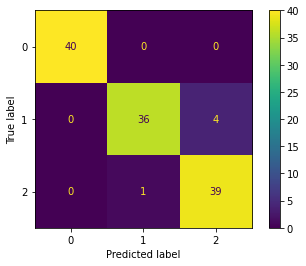

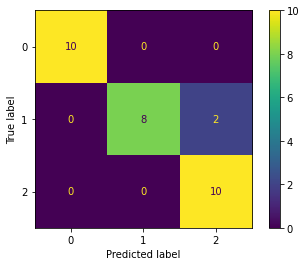

In [12]:
from sklearn import metrics

metrics.plot_confusion_matrix(dtree,xtrain,ytrain)
metrics.plot_confusion_matrix(dtree,xtest,ytest)

In [13]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
model1 = tree.DecisionTreeClassifier()
cv = cross_val_score(
    dtree,scaledx,encodedy,cv=5,scoring='accuracy'
)
cv.mean()

0.9466666666666667

In [14]:
tree.DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [15]:
#hyperperameter tuning
from sklearn.model_selection import RandomizedSearchCV

Tree=tree.DecisionTreeClassifier()

gridtree=RandomizedSearchCV(
    Tree,
    param_distributions={
        'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'max_depth':list(range(5,50,3)),
        'min_samples_split':list(range(2,40,2)),
        'max_features':['None','auto','sqrt','log2']

    },
    cv=5,scoring='accuracy', n_iter=20,n_jobs=-1,verbose=2
)
gridtree.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47],
                                        'max_features': ['None', 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 34,
                                                              36, 38],
                                        'splitter': ['best', 'random']},


In [16]:
gridtree.best_params_

{'splitter': 'best',
 'min_samples_split': 20,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'entropy'}

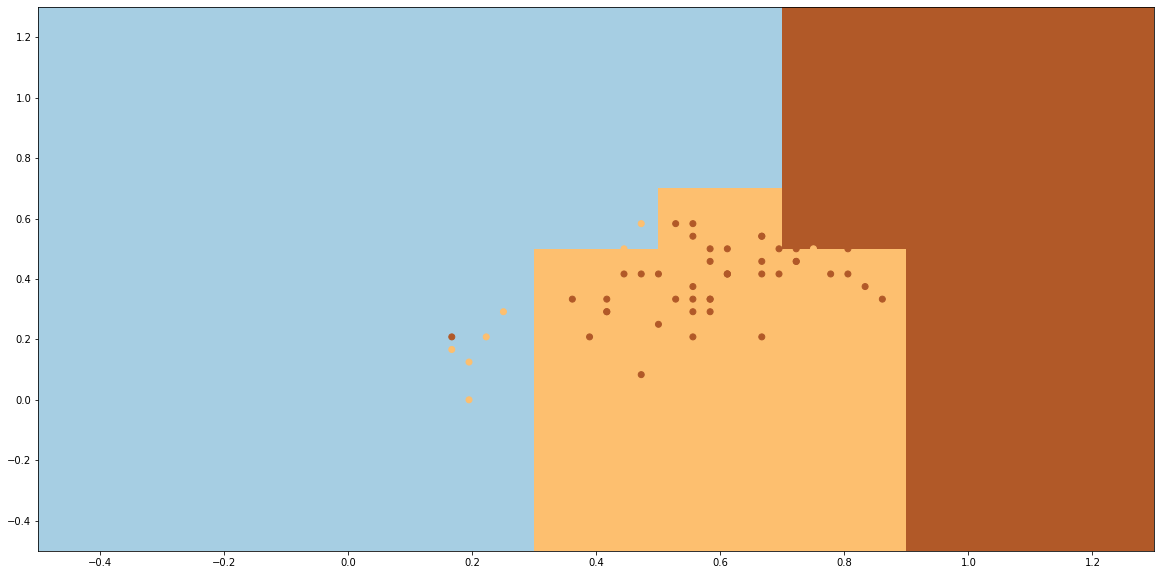

In [17]:
#analysis
final_model=tree.DecisionTreeClassifier()
final_model.fit(scaledx[:,:2],encodedy)

xmin,xmax = scaledx[:,:2][:,0].min()-0.5,scaledx[:,:2][:,0].max()+0.5
ymin,ymax = scaledx[:,:2][:,1].min()-0.5,scaledx[:,:2][:,1].max()+0.5

xx,yy=np.meshgrid(
    np.arange(xmin,xmax,0.2),np.arange(xmin,ymax,0.2)
)
z= final_model.predict(np.c_[xx.ravel(),yy.ravel()])
z
#color
z=z.reshape(xx.shape)
plt.figure(1,figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)

#plot
plt.scatter(scaledx[:,:2][:,0],scaledx[:,:2][:,1],c=encodedy)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()